In [1]:
# list of imports I'll need for exploring the dataframe 'telco'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import env
import acquire
import wrangle

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Acquiring the data: importing 'telco' and looking at the raw data
from wrangle import get_telco_data
telco = get_telco_data()
telco  

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [3]:
#Prep the data
from wrangle import prep_telco_data
train, validate, test = prep_telco_data(telco)

In [4]:
#Look at the data overall
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3937 non-null   int64  
 1   tenure                                 3937 non-null   int64  
 2   monthly_charges                        3937 non-null   float64
 3   total_charges                          3937 non-null   float64
 4   gender_encoded                         3937 non-null   int64  
 5   partner_encoded                        3937 non-null   int64  
 6   dependents_encoded                     3937 non-null   int64  
 7   phone_service_encoded                  3937 non-null   int64  
 8   paperless_billing_encoded              3937 non-null   int64  
 9   churn_encoded                          3937 non-null   int64  
 10  gender_Male                            3937 non-null   uint8  
 11  p

In [5]:
#Separating my data for further purposes
X_train = train.drop(columns='churn_encoded')
y_train = train[['churn_encoded']]


cat_cols, num_cols = [], []
for col in X_train.columns:
    if X_train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if X_train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [6]:
#I want to look at the categorical columns
cat_cols

['senior_citizen',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'paperless_billing_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [7]:
#I want to look at the numerical columns
num_cols

['tenure', 'monthly_charges', 'total_charges']

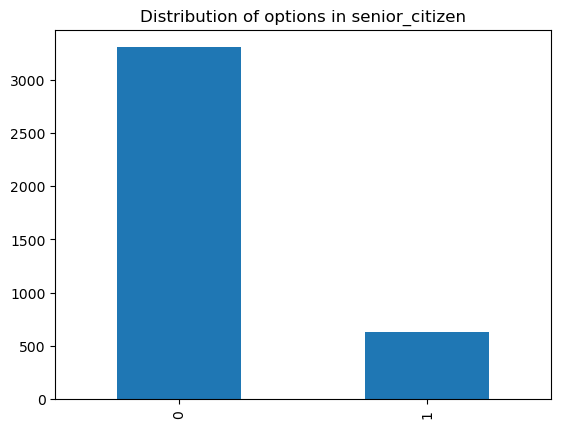

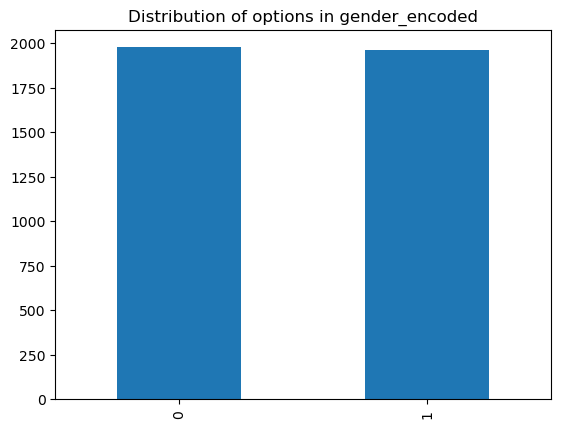

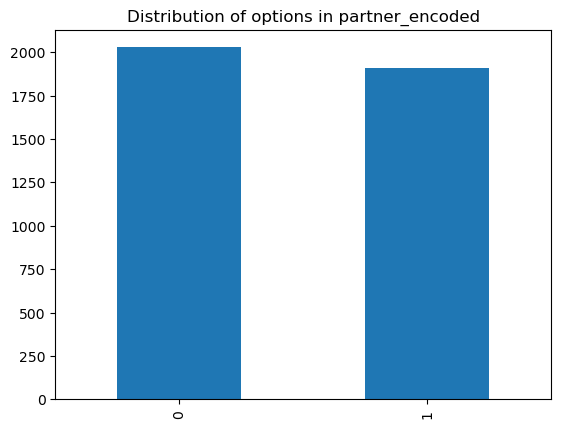

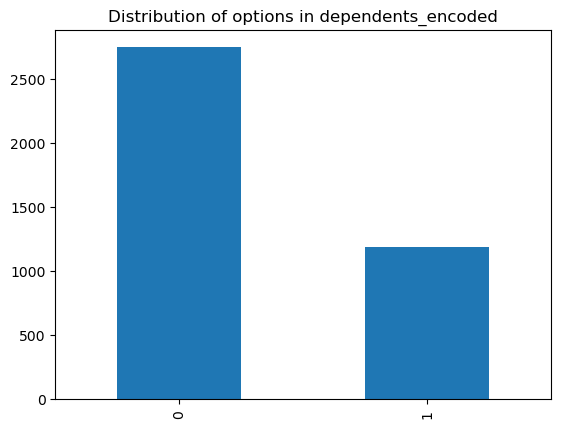

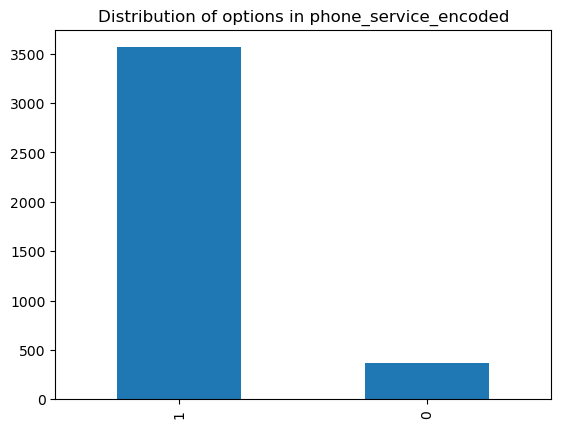

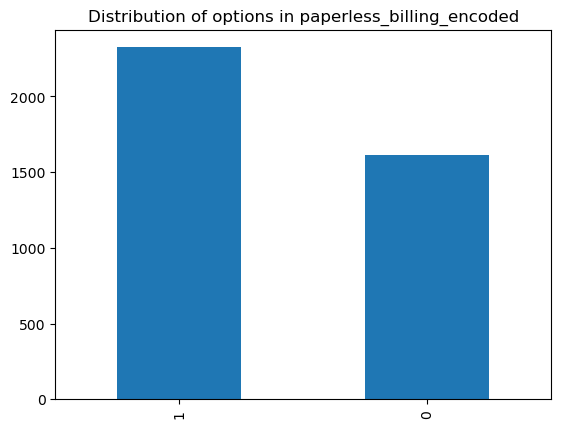

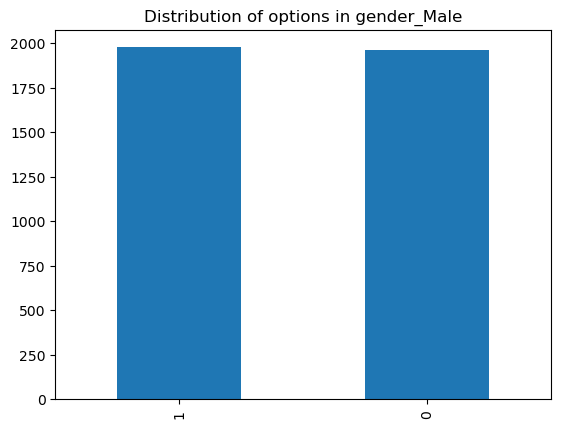

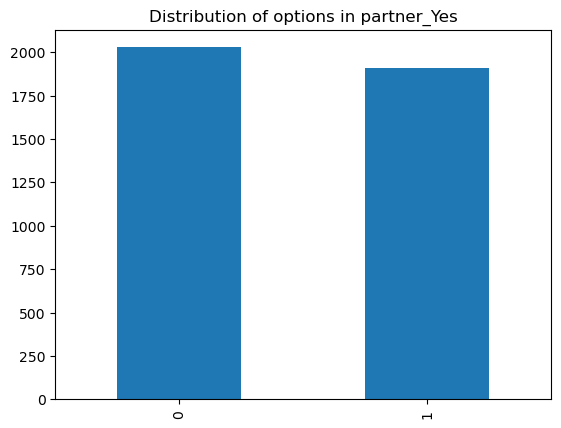

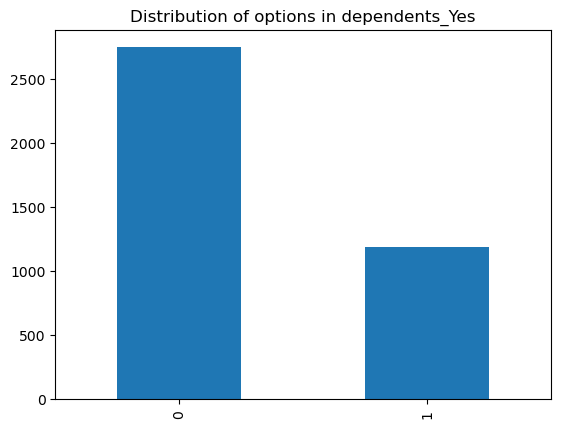

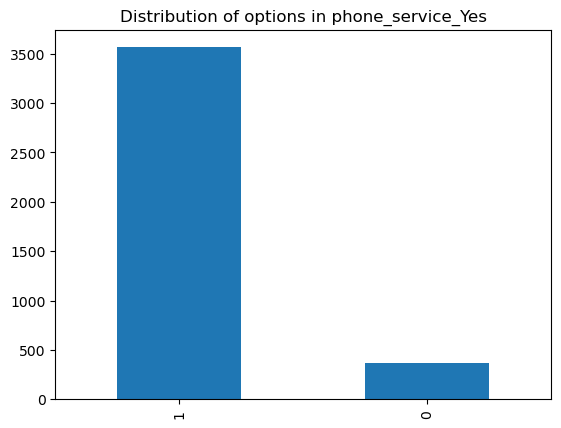

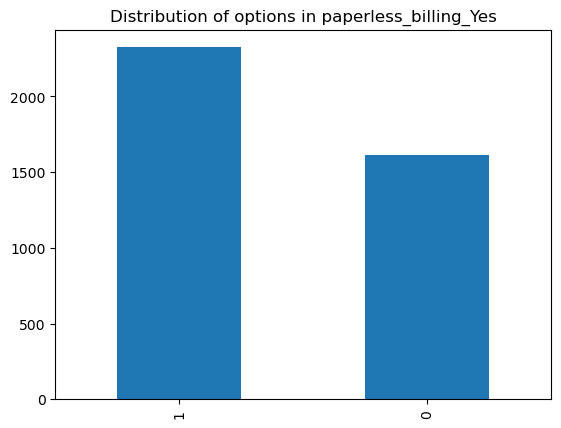

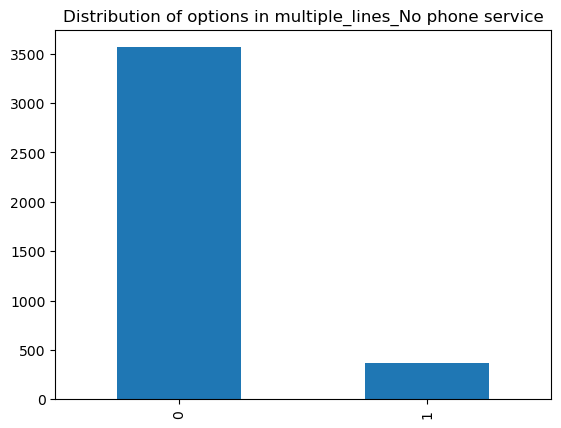

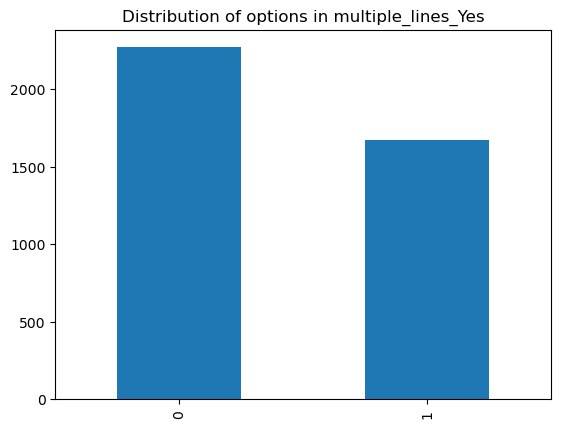

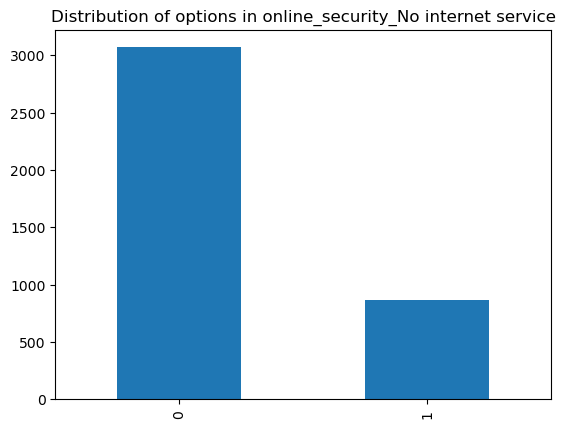

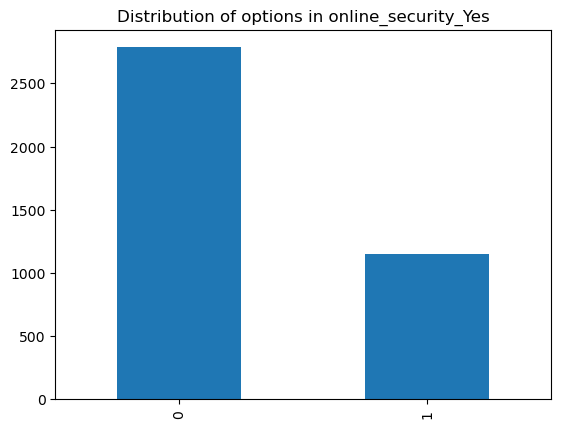

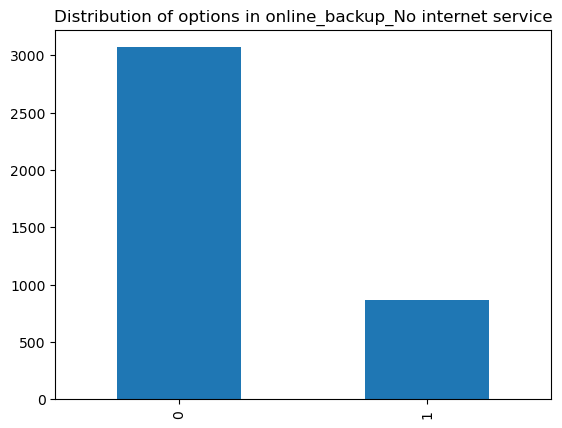

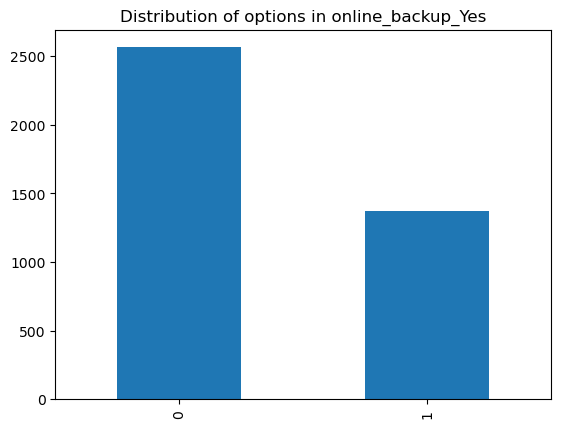

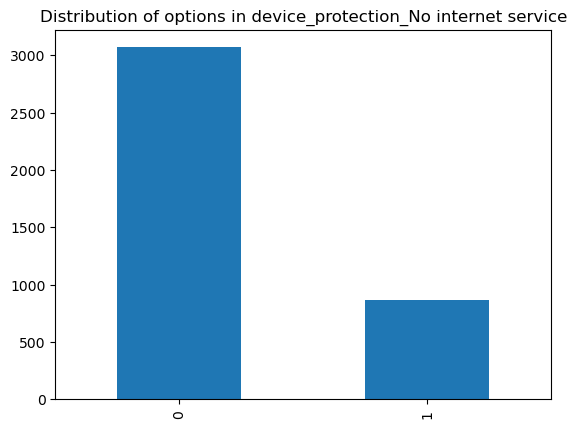

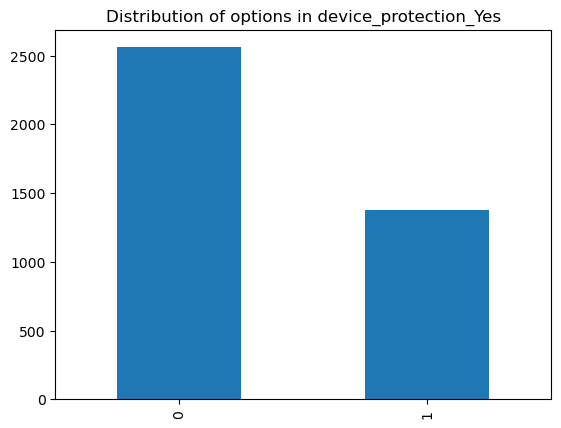

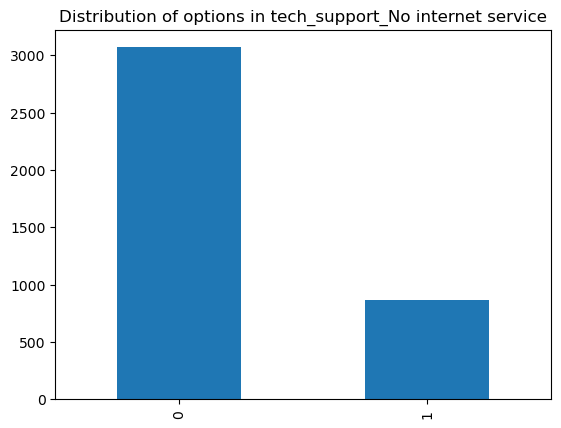

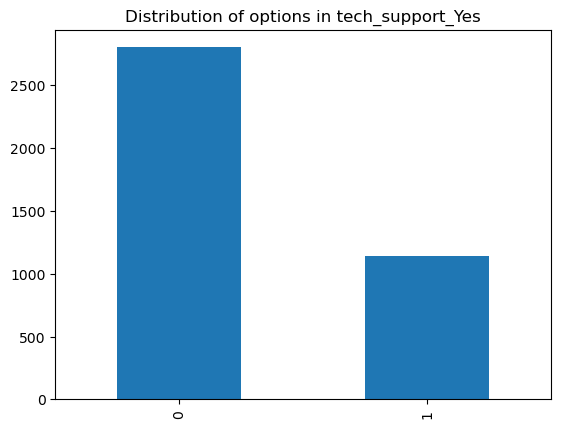

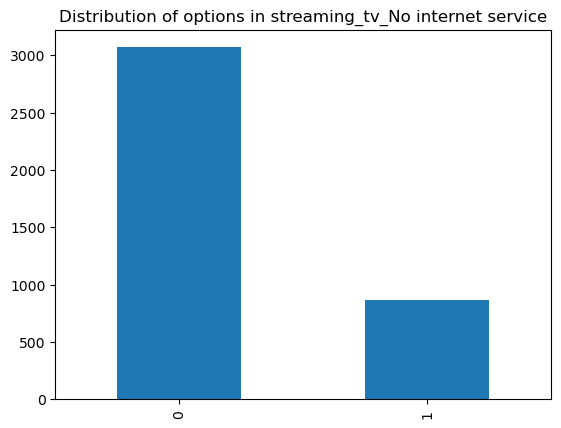

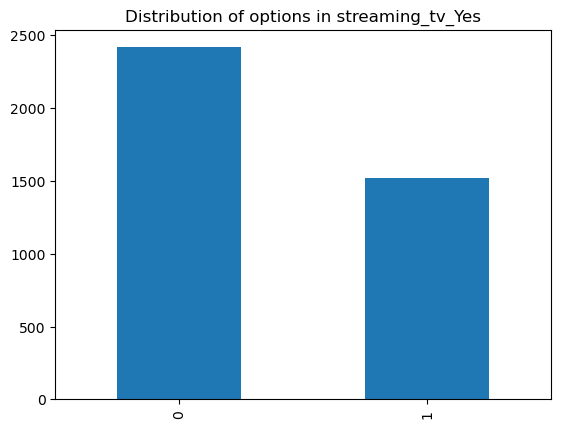

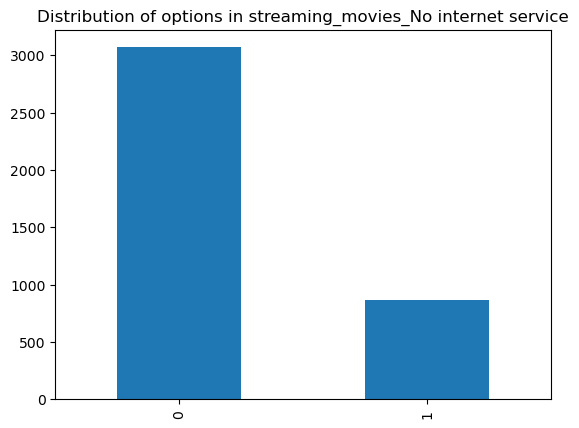

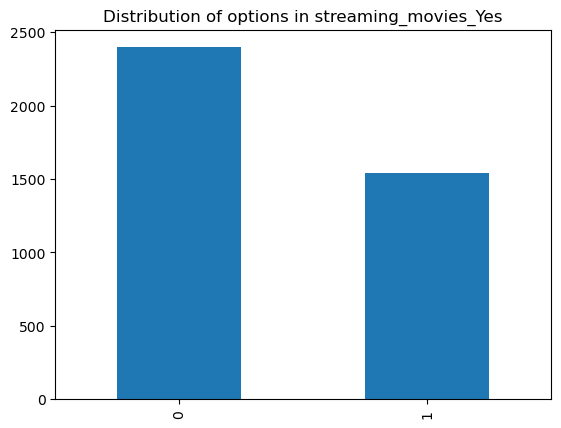

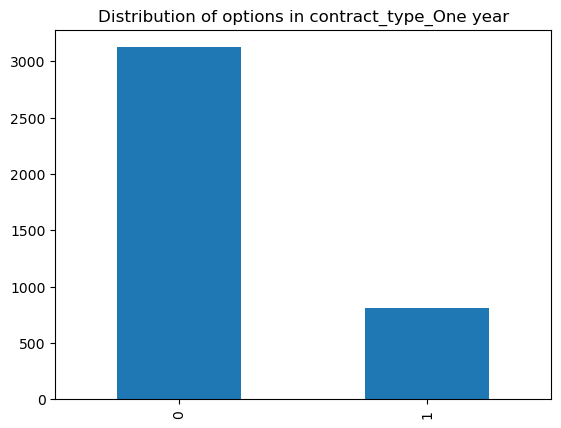

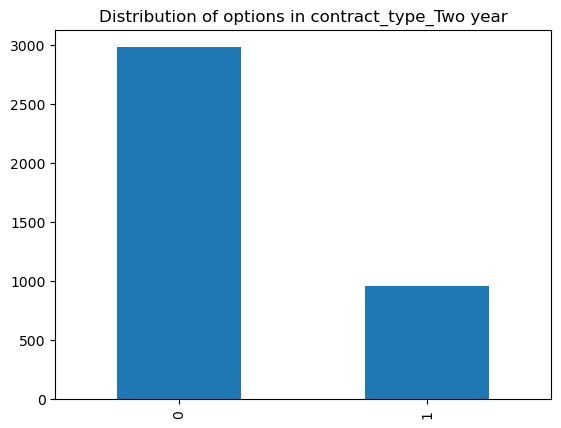

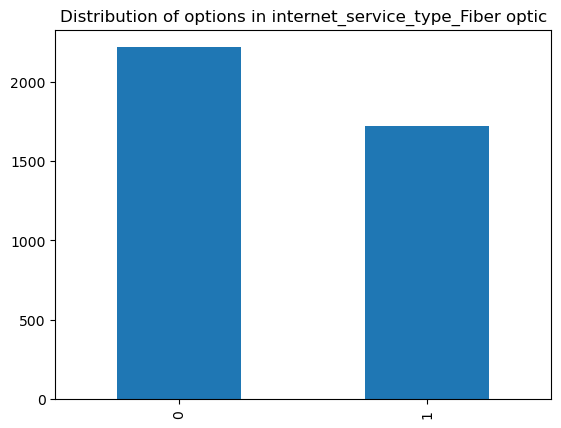

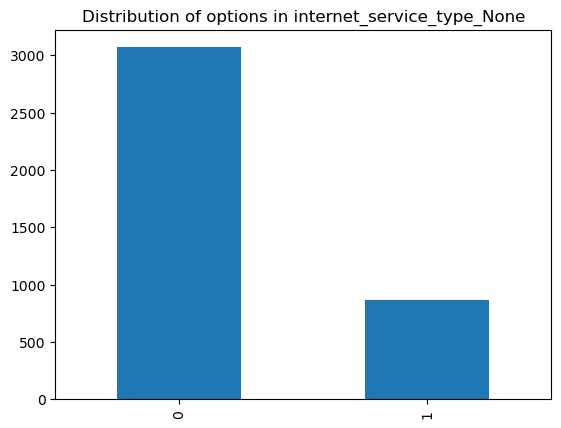

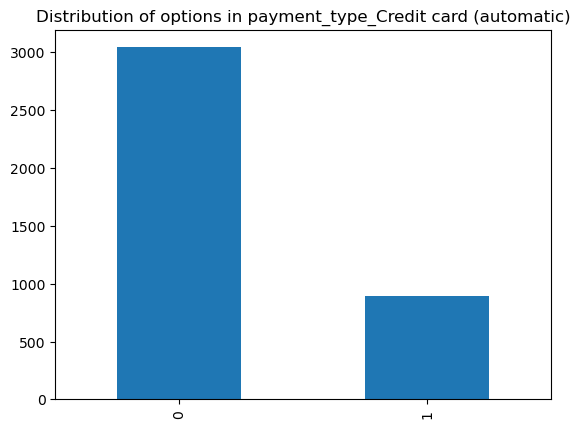

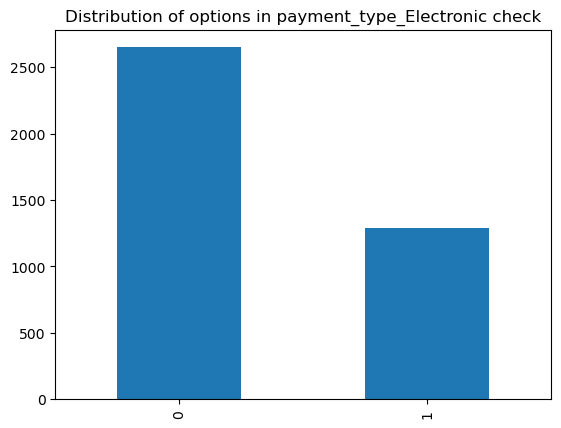

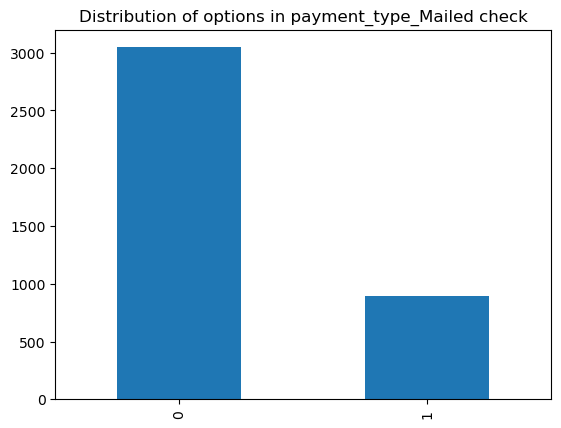

In [8]:
#Let's visualize the categorical columns
for col in cat_cols:
    train[col].value_counts().plot(
        kind='bar').set(
        title=f'Distribution of options in {col}')
    plt.show()

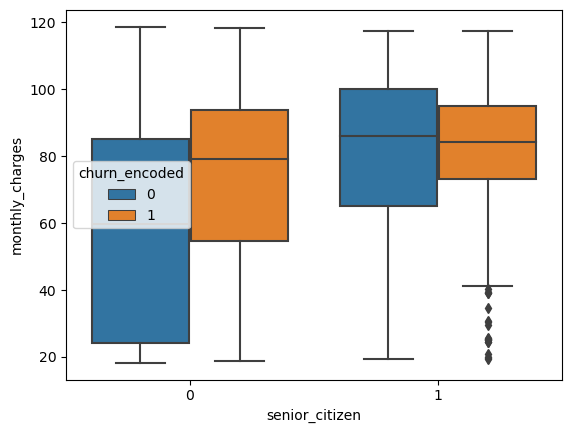

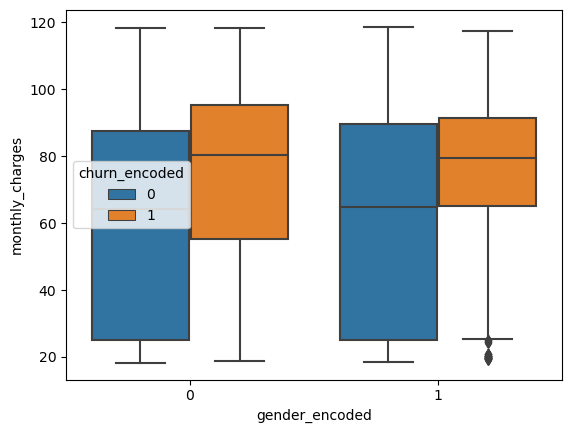

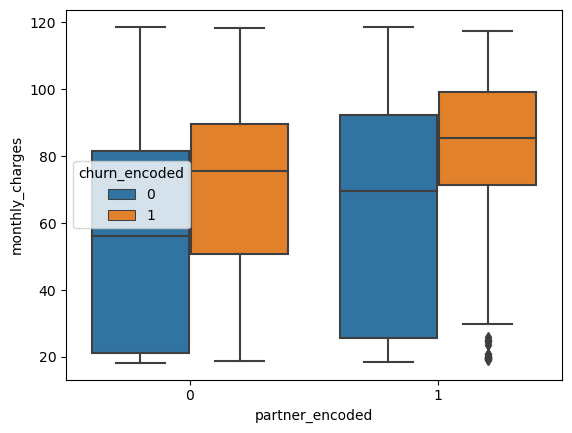

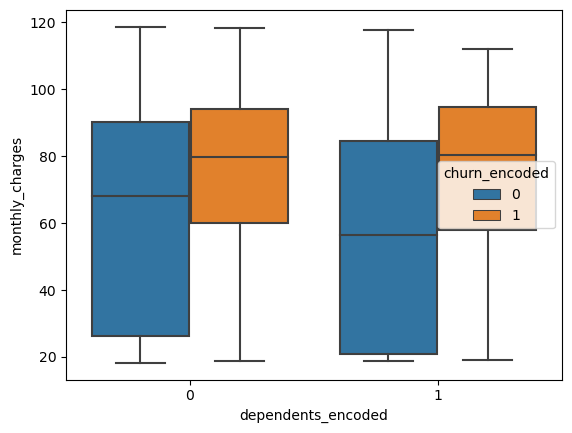

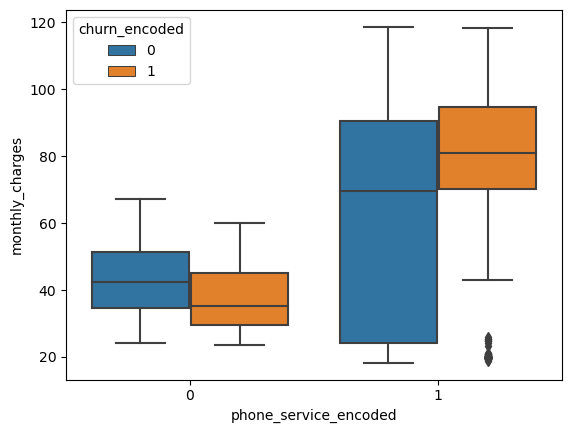

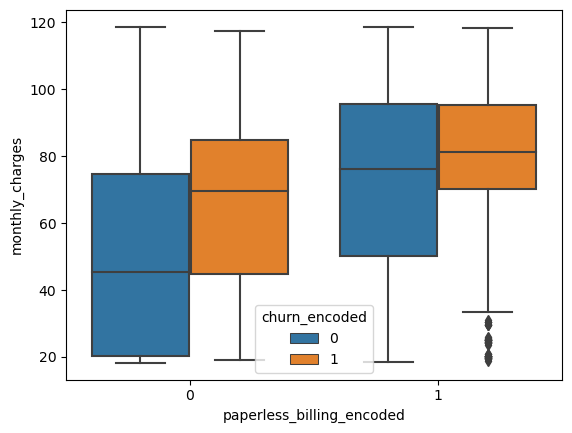

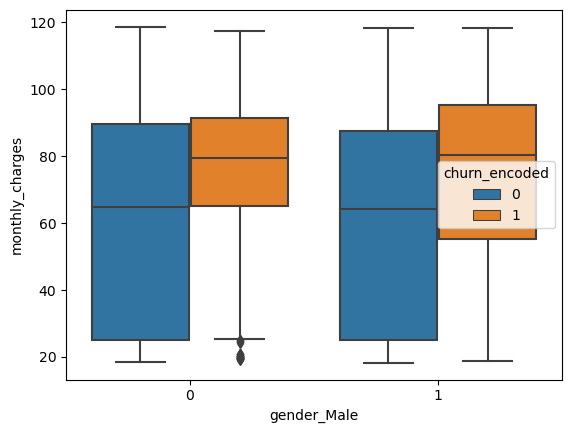

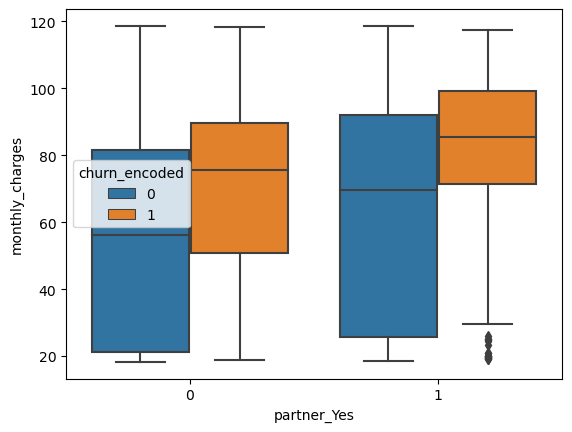

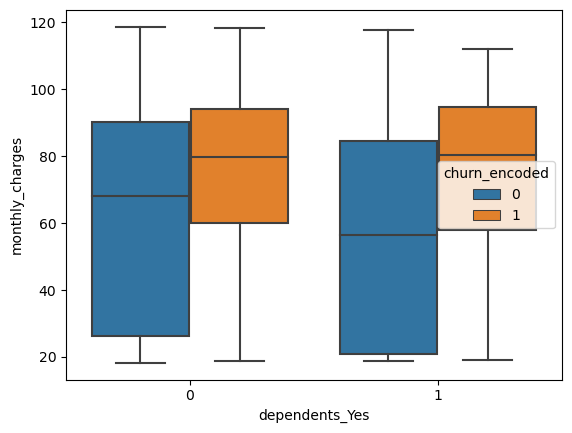

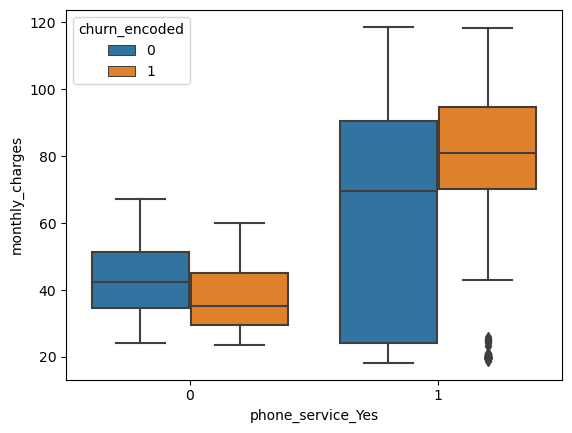

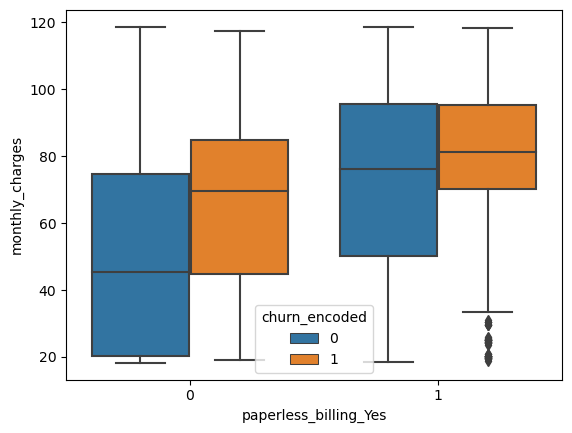

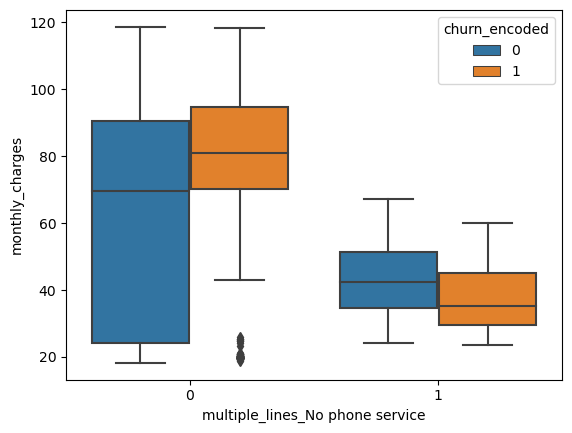

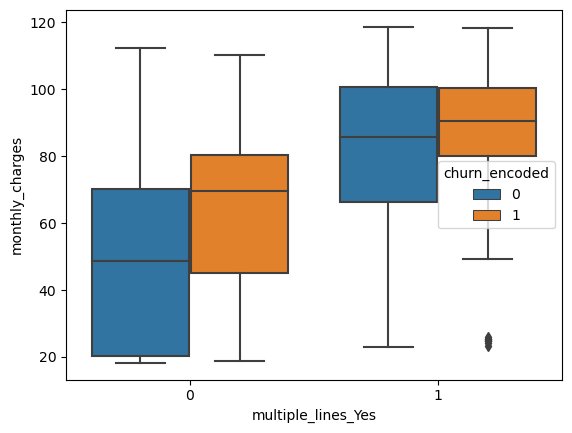

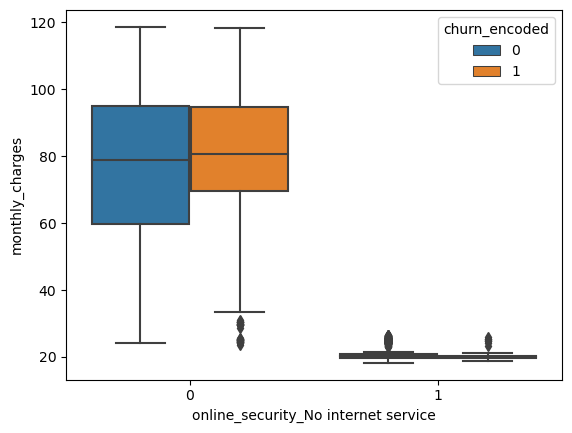

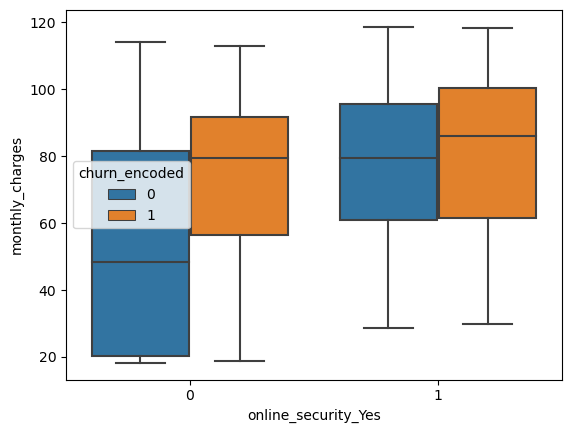

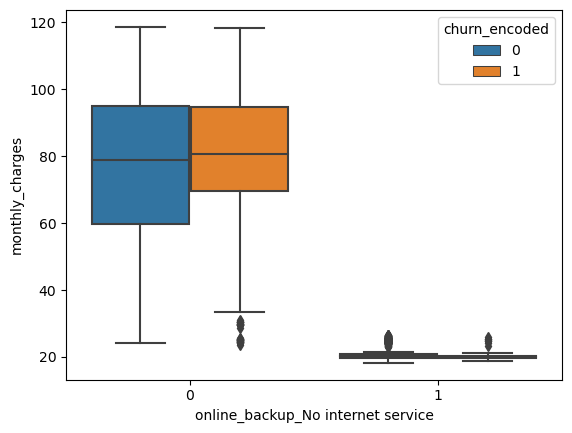

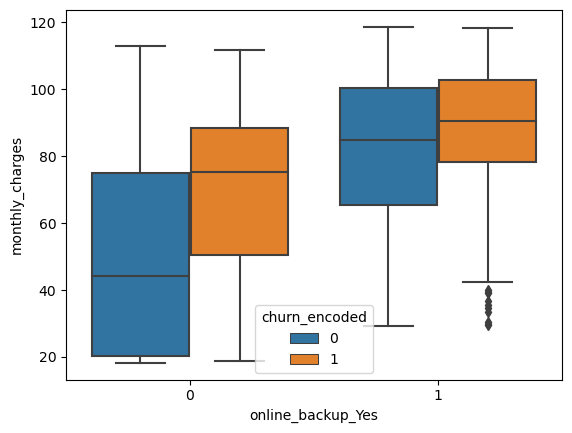

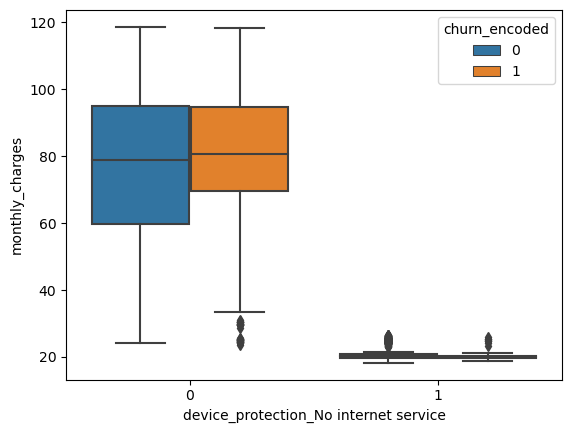

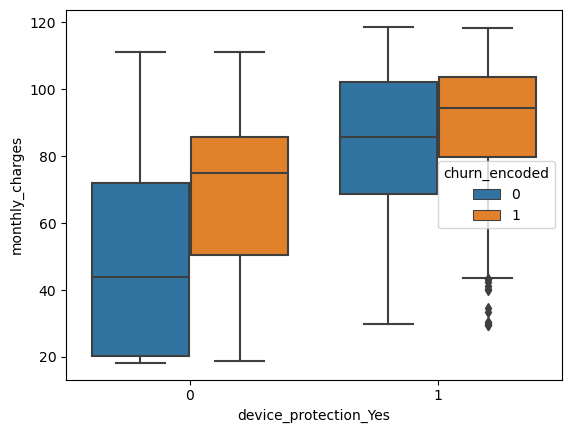

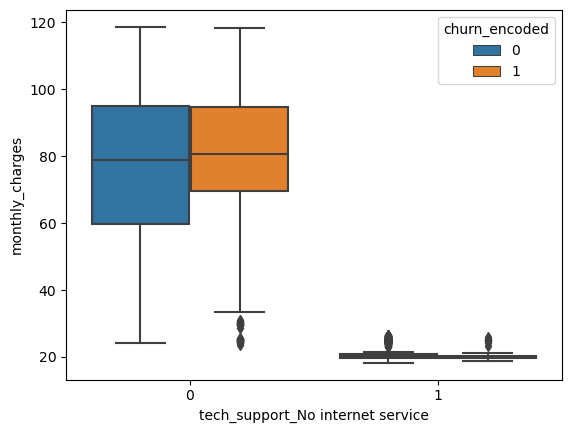

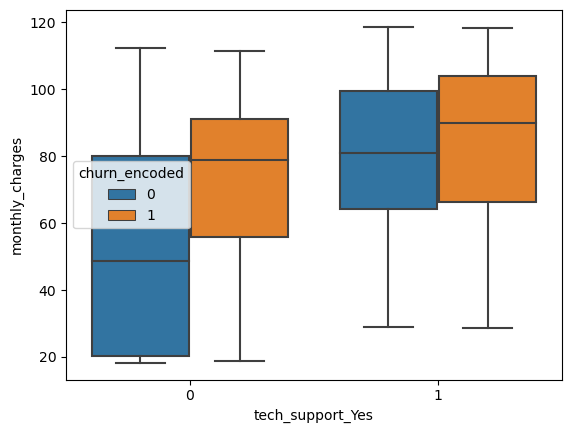

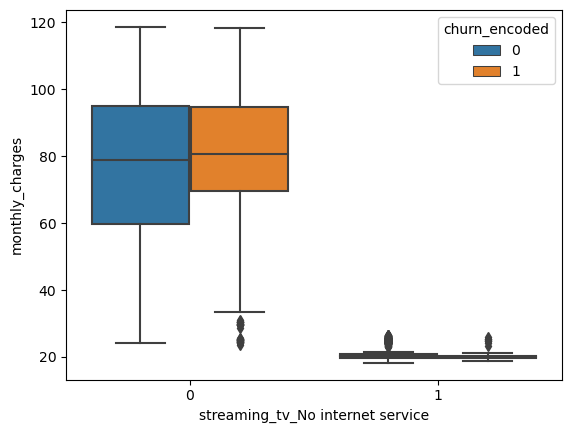

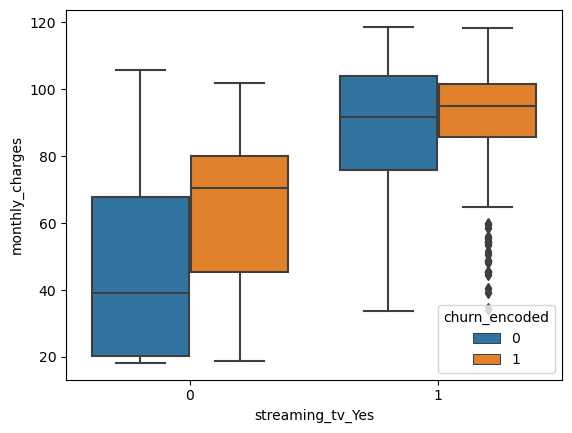

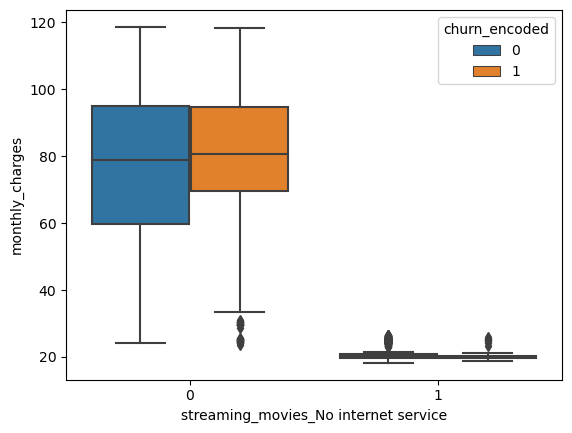

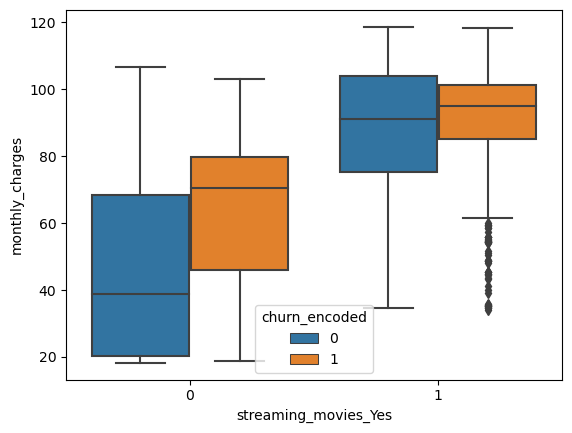

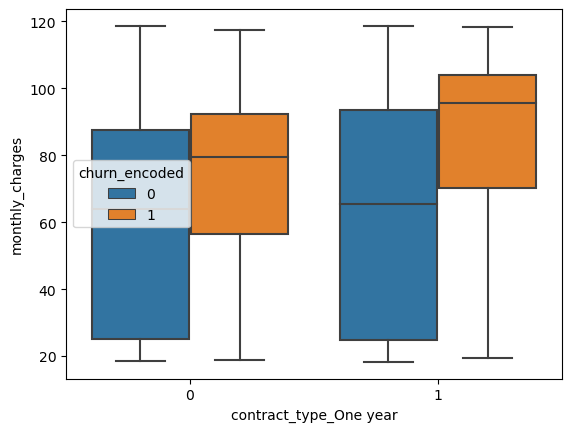

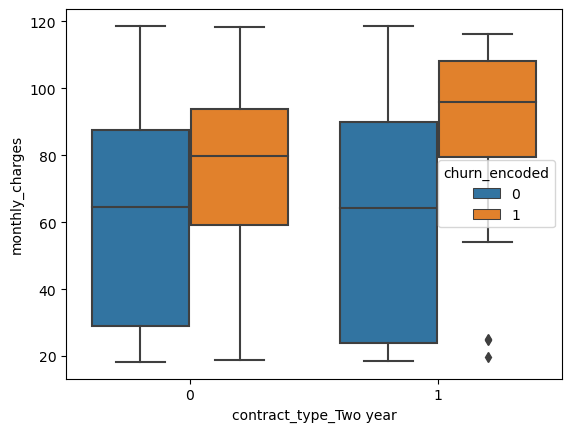

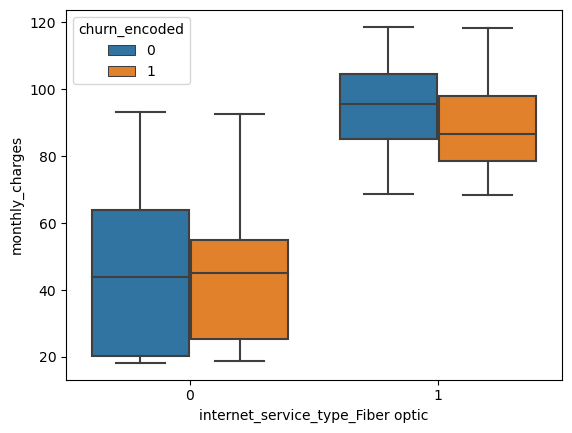

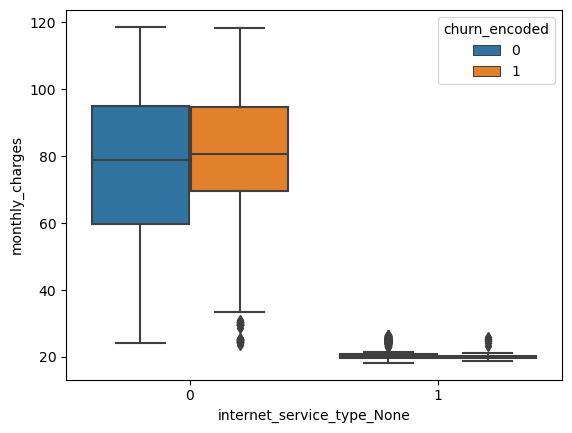

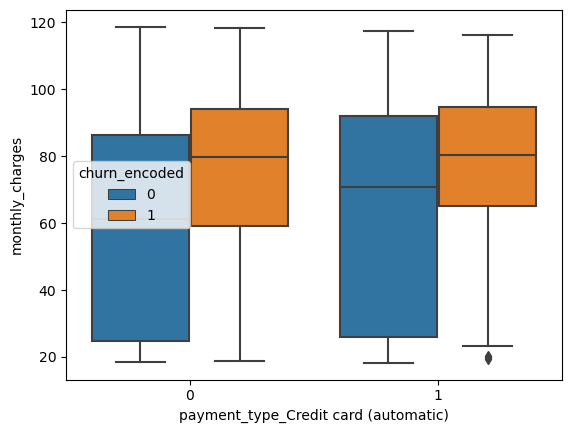

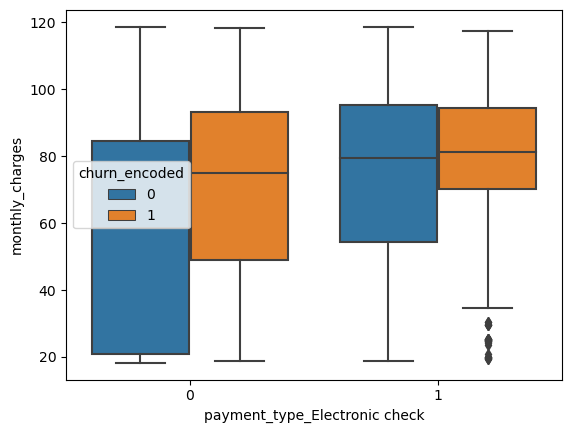

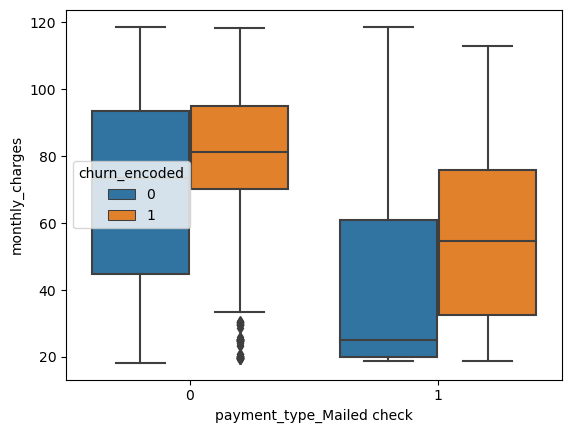

In [9]:
#Let's visualize the categorical columns using boxplots

for col in cat_cols:
    #sns.boxplot(data = telco_train, y = telco_train.monthly_charges, x = 'payment_type', hue = 'churn')
    sns.boxplot(data = train, y = train.monthly_charges, x = col, hue = 'churn_encoded')
    plt.show()

Takeaways for Categorical Visual Exploration

In [10]:
##### From a visual standpoint looking at each cat_col versus churn, I'd garner that online_security and gender might be the only columns I'd remove. 
##### There seems to be no difference in those categories in their relation to churn.  
##### At worst, I'd do a chi-squared test to see if there's anything worth looking at.



#### Looking at each feature against 'monthly charges' in regards to the target 'churn', here is what I saw:

#significant
#- contract_type
#- paperless_billing (very slight)
#- dependents
#- partner
#- payment_type
#- senior_citizen (customers who are NOT a senior_citizen)
#
#
#non-significant
#- payment_type ('mailed check' had something to look at, but as a part of a whole . . .)
#- internet_service_type
#- streaming_movies
#- streaming_tv
#- tech_support
#- device_protection
#- online_backup


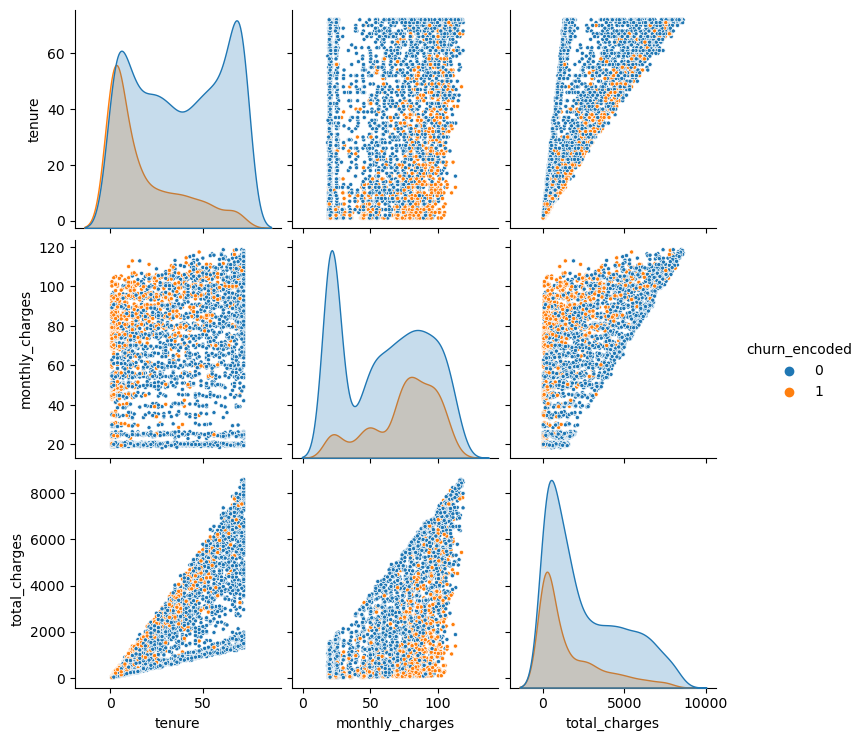

In [11]:
#Look at num_cols (continuous data)

sns.pairplot(data = train, vars=num_cols, hue = 'churn_encoded', markers='.')
plt.show()

Takeaways for numerical column visual exploration

In [12]:
#### - The higher the monthly charges coupled with low tenure, the more likely someone churns
#### - Those with lower tenure seem to churn
#### - The density of those likely to churn were found in the area for higher monthly charges in the total_charges column 
#### - It appears that monthly charges and tenure are big drivers for churn.

In [13]:
## Determine if it would be valuable to bin some numeric columns

num_cols

['tenure', 'monthly_charges', 'total_charges']

In [14]:
train.tenure.describe() #### I do not think that I would put a range on this column

count    3937.000000
mean       32.775210
std        24.709604
min         1.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [15]:
train.monthly_charges.describe() #### I'd put a range on this column

count    3937.000000
mean       64.805131
std        30.294804
min        18.250000
25%        34.700000
50%        70.250000
75%        90.300000
max       118.650000
Name: monthly_charges, dtype: float64

In [16]:
train.total_charges.describe()   #### The range on this column is quite significant, so I think I'd definitely bin it

count    3937.000000
mean     2316.775641
std      2284.984394
min        18.850000
25%       396.100000
50%      1414.800000
75%      3893.600000
max      8594.400000
Name: total_charges, dtype: float64

In [17]:
####Bin Monthly Charges and Total Charges??
monthly_charges_bin = pd.cut(train.monthly_charges, bins = [18.25, 35.576, 89.80, 118.75]).sort_index()
total_charges_bin = pd.cut(train.total_charges, bins = [0, 420, 4155.376, 84050]).sort_index()

bin1 = pd.crosstab(monthly_charges_bin, train.churn_encoded)
bin2 = pd.crosstab(total_charges_bin, train.churn_encoded)
bin1, bin2

(churn_encoded       0    1
 monthly_charges           
 (18.25, 35.576]   888  115
 (35.576, 89.8]   1317  603
 (89.8, 118.75]    685  328,
 churn_encoded           0    1
 total_charges                 
 (0.0, 420.0]          574  446
 (420.0, 4155.376]    1549  467
 (4155.376, 84050.0]   768  133)

<Axes: ylabel='monthly_charges'>

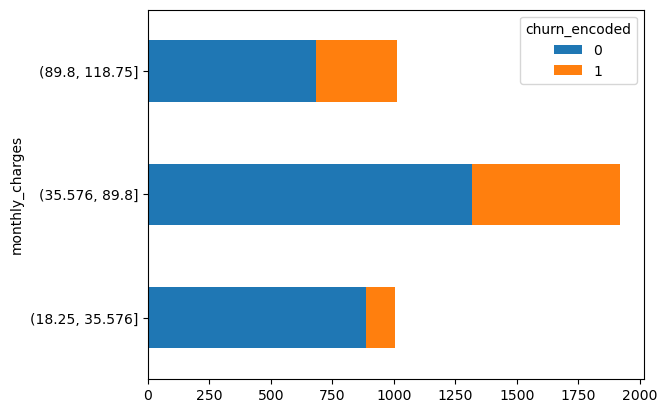

In [18]:
bin1.plot.barh(stacked=True) ####Binned Monthly Charges

<Axes: ylabel='total_charges'>

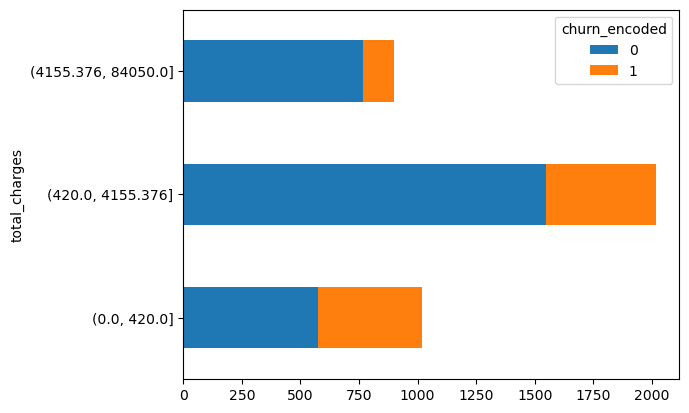

In [19]:
bin2.plot.barh(stacked=True) ####Binned Total Charges

In [20]:
#### Developing Questions
# --- Are any of the following categorical features significantly affecting churn?
#- contract_type
#- paperless_billing (very slight)
#- dependents
#- partner
#- payment_type
#- senior_citizen (customers who are NOT a senior_citizen)


# --- Are any of the following numerical (continuous) features significantly affecting churn?
#- tenure 
#- monthly_charges
#- total_charges 

 
# --- Which feature significantly affects churn the most?


# --- What are the top 2 or 3 in order of significance?

In order to start to address the developing questions listed above, I need to prepare my data for my tests and my models.

In [21]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,19.20,19.20,0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.90,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
train_X = train.drop(columns='churn_encoded')
train_y = train[['churn_encoded']]

validate_X = validate.drop(columns='churn_encoded')
validate_y = validate[['churn_encoded']]

test_X = test.drop(columns='churn_encoded')
test_y = test[['churn_encoded']]

In [23]:
train_X.head()  ####Everything looks good here

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,gender_Male,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,1,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,19.20,19.20,0,1,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.90,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [24]:
train_y.head().T  ####Everything looks good here

,5919,1915,5054,2355,6279
churn_encoded,0,0,0,0,0


In [25]:
#### Now to do a few chi-tests to see if there is anything significant between a few features and churn

####Contract_type One year
observed = pd.crosstab(train['contract_type_One year'], train.churn_encoded)
observed

churn_encoded,0,1
contract_type_One year,,
0,2165,957
1,726,89


In [26]:
null = "There is no association between contract_type and churn"
alpha = 0.05

In [27]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=127.98478360373738, pvalue=1.131068173176852e-29, dof=1, expected_freq=array([[2292.53289307,  829.46710693],
       [ 598.46710693,  216.53289307]]))

In [28]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [29]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
_____________________

𝛘² = {chi2:.4f}
p  = {p:.4f}
''')

Observed:
[[2165  957]
 [ 726   89]]

Expected:
[[2292  829]
 [ 598  216]]
_____________________

𝛘² = 127.9848
p  = 0.0000



In [30]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between contract_type and churn


<div class="alert alert-info" role="alert">
Chi-test shows there is an association between contract type and churn

In [31]:
#### I will repeat this test for all categorical features described above.

####Paperless_billing
observed1 = pd.crosstab(train.paperless_billing_Yes, train.churn_encoded)
observed1

churn_encoded,0,1
paperless_billing_Yes,,
0,1347,266
1,1544,780


In [32]:

null = "There is no association between paperless_billing and churn"
alpha = 0.05

In [33]:
stats.chi2_contingency(observed1)

Chi2ContingencyResult(statistic=141.36421534893537, pvalue=1.3393723943150956e-32, dof=1, expected_freq=array([[1184.4508509,  428.5491491],
       [1706.5491491,  617.4508509]]))

In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed1)

In [35]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
_____________________

𝛘² = {chi2:.4f}
p  = {p:.4f}
''')

Observed:
[[2165  957]
 [ 726   89]]

Expected:
[[1184  428]
 [1706  617]]
_____________________

𝛘² = 141.3642
p  = 0.0000



In [36]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between paperless_billing and churn


<div class="alert alert-info" role="alert">
Chi-test shows there is an association between paperless_billing and churn

In [37]:
####Dependents
observed2 = pd.crosstab(train.dependents_Yes, train.churn_encoded)
observed2

churn_encoded,0,1
dependents_Yes,,
0,1885,860
1,1006,186


In [38]:
null = "There is no association between dependents and churn"
alpha = 0.05

In [39]:
stats.chi2_contingency(observed2)

Chi2ContingencyResult(statistic=104.54250197871723, pvalue=1.5385742575781703e-24, dof=1, expected_freq=array([[2015.69596139,  729.30403861],
       [ 875.30403861,  316.69596139]]))

In [40]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)

In [41]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between dependents and churn


<div class="alert alert-info" role="alert">
Chi-test shows there is an association between dependents and churn

In [42]:
####Partner
observed3 = pd.crosstab(train.partner_encoded, train.churn_encoded)
observed3

churn_encoded,0,1
partner_encoded,,
0,1364,663
1,1527,383


In [43]:
null = "There is no association between partner and churn"
alpha = 0.05

In [44]:
stats.chi2_contingency(observed3)

Chi2ContingencyResult(statistic=80.0893287503929, pvalue=3.578598859815084e-19, dof=1, expected_freq=array([[1488.45745491,  538.54254509],
       [1402.54254509,  507.45745491]]))

In [45]:
chi2, p, degf, expected = stats.chi2_contingency(observed3)

In [46]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between partner and churn


<div class="alert alert-info" role="alert">
Chi-test shows there is an association between dependents and churn

In [47]:
#- payment_type
#- senior_citizen (customers who are NOT a senior_citizen)




In [48]:
####Contract Type Two Year
observed4 = pd.crosstab(train['contract_type_Two year'], train.churn_encoded)
observed4

churn_encoded,0,1
contract_type_Two year,,
0,1964,1016
1,927,30


In [49]:
null = "There is no association between contract_type_Two year and churn"
alpha = 0.05

In [50]:
stats.chi2_contingency(observed4)

Chi2ContingencyResult(statistic=354.28563833851206, pvalue=4.941935969249593e-79, dof=1, expected_freq=array([[2188.26009652,  791.73990348],
       [ 702.73990348,  254.26009652]]))

In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed4)

In [52]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between contract_type_Two year and churn


<div class="alert alert-info" role="alert">
Chi-test shows there is an association between contract type Two year and churn

In [53]:
####Senior Citizen
observed5 = pd.crosstab(train['senior_citizen'], train.churn_encoded)
observed5

churn_encoded,0,1
senior_citizen,,
0,2527,775
1,364,271


In [54]:
null = "There is no association between contract_type_Two year and churn"
alpha = 0.05

In [55]:
stats.chi2_contingency(observed5)

Chi2ContingencyResult(statistic=99.71917005784367, pvalue=1.7561315684822695e-23, dof=1, expected_freq=array([[2424.70967742,  877.29032258],
       [ 466.29032258,  168.70967742]]))

In [56]:
chi2, p, degf, expected = stats.chi2_contingency(observed5)

In [57]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between contract_type_Two year and churn


<div class="alert alert-info" role="alert">
Chi-test shows there is an association between contract type Two year and churn

In [59]:
####Tenure
observed6 = pd.crosstab(train.tenure, train.churn_encoded)
observed6

churn_encoded,0,1
tenure,,
1,137,214
2,62,79
3,54,58
4,60,44
5,34,31
...,...,...
68,62,4
69,48,5
70,49,4


In [60]:
null = "There is no association between tenure and churn"
alpha = 0.05

In [61]:
stats.chi2_contingency(observed6)

Chi2ContingencyResult(statistic=626.7233176528196, pvalue=6.794556914124504e-90, dof=71, expected_freq=array([[257.74472949,  93.25527051],
       [103.53848108,  37.46151892],
       [ 82.24333249,  29.75666751],
       [ 76.36880874,  27.63119126],
       [ 47.73050546,  17.26949454],
       [ 45.52755906,  16.47244094],
       [ 55.07366015,  19.92633985],
       [ 47.73050546,  17.26949454],
       [ 46.26187452,  16.73812548],
       [ 51.4020828 ,  18.5979172 ],
       [ 35.24714249,  12.75285751],
       [ 46.99618999,  17.00381001],
       [ 47.73050546,  17.26949454],
       [ 27.16967234,   9.83032766],
       [ 35.98145796,  13.01854204],
       [ 29.37261875,  10.62738125],
       [ 29.37261875,  10.62738125],
       [ 35.24714249,  12.75285751],
       [ 30.84124968,  11.15875032],
       [ 28.63830328,  10.36169672],
       [ 23.498095  ,   8.501905  ],
       [ 35.24714249,  12.75285751],
       [ 31.57556515,  11.42443485],
       [ 35.98145796,  13.01854204],
       [ 

In [62]:
chi2, p, degf, expected = stats.chi2_contingency(observed6)

In [63]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between tenure and churn


Modeling Time

In [ ]:
train.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

continuous_features = ['monthly_charges', 'total_charges', 'tenure']
scaler = MinMaxScaler()
scaler.fit(train[continuous_features])

train[['monthly_charges_scaled', 'total_charges_scaled', 'tenure_scaled']] = scaler.transform(train[continuous_features])
train = train.drop(columns = ['monthly_charges', 'total_charges', 'tenure'])
train.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

continuous_features = ['monthly_charges', 'total_charges', 'tenure']
scaler = MinMaxScaler()
scaler.fit(validate[continuous_features])

validate[['monthly_charges_scaled', 'total_charges_scaled', 'tenure_scaled']] = scaler.transform(validate[continuous_features])
validate = validate.drop(columns=['monthly_charges', 'total_charges', 'tenure'])
validate.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

continuous_features = ['monthly_charges', 'total_charges', 'tenure']
scaler = MinMaxScaler()
scaler.fit(test[continuous_features])

test[['monthly_charges_scaled', 'total_charges_scaled', 'tenure_scaled']] = scaler.transform(test[continuous_features])
test = test.drop(columns=['monthly_charges', 'total_charges', 'tenure'])
test.info()

In [ ]:
X_train = train.drop(columns=['churn_encoded'])
y_train = train[['churn_encoded']]
X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate[['churn_encoded']]
X_test = test.drop(columns=['churn_encoded'])
y_test = test[['churn_encoded']]

What metric do I want to use for prediction?

In [ ]:
baseline = train.churn_encoded.mean()
baseline

In [ ]:
train.churn_encoded.value_counts()

In [ ]:
baseline_accuracy = (train.churn_encoded == 0).mean()
baseline_accuracy #0.73 or 73%

In [ ]:
print(f'We would say that a model is not useful to us unless it does better than {round(baseline_accuracy, 2)}')


# Decision Tree

In [ ]:
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

In [ ]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_train)[:20]

In [ ]:
clf.score(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
conf = confusion_matrix(y_train, y_pred)
conf

In [ ]:
labels = sorted(y_train.unique())
labels

In [ ]:
pd.DataFrame(conf)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
print(f"Accuracy of Decision Tree on train data is {clf.score(X_train, y_train)}")
print(f"Accuracy of Decision Tree on validate data is {clf.score(X_validate, y_validate)}")

# KNN

In [ ]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [ ]:
logit.fit(X_train, y_train)

In [ ]:
LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [ ]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
y_pred = logit.predict(X_train)

In [ ]:
y_pred_proba = logit.predict_proba(X_train)

In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))


# Random Forest

In [64]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
print(rf.feature_importances_)

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
y_pred_proba = rf.predict_proba(X_train)

In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [65]:
from wrangle import get_random_forest_test
get_random_forest_test()

Accuracy of random forest classifier on test set: 0.79


In [67]:
from wrangle import get_telco_data
telco = get_telco_data()
train, validate, test = prep_telco_data(telco)
baseline = train.churn_encoded.mean()
baseline_accuracy = (train.churn_encoded == 0).mean()
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded
X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded
X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

rf = RandomForestClassifier(bootstrap=True, 
                        class_weight=None, 
                        criterion='gini',
                        min_samples_leaf=3,
                        n_estimators=100,
                        max_depth=3, 
                        random_state=123)

rf.fit(X_test, y_test)

y_pred = rf.predict(X_test)

y_pred_proba = rf.predict_proba(X_test)